# Project - Applied Statistics

## Data Description:
The data at hand contains medical costs of people characterized by certain attributes.

## Context:


Leveraging customer information is paramount for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.

### 1. Import the necessary libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set(color_codes=True) 
%matplotlib inline 
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

### 2.Read the data as a data frame

In [2]:
df=pd.read_csv("C:\\Users\\vsatheesh\\Documents\\PGP AIML\\Project\\01_Applied_Statistics\\insurance.csv")

### 3.EDA - shape & type of Data

In [4]:
df.shape

(1338, 7)

In [10]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 4.EDA - Checking the presence of missing values

In [23]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 5. EDA - Five point summary of numerical attributes

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###  6. EDA - Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

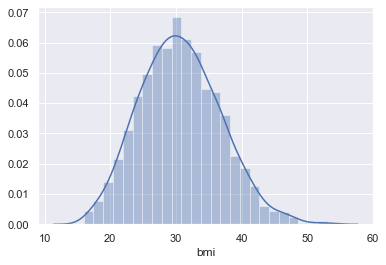

In [11]:
sns.distplot(df['bmi'])

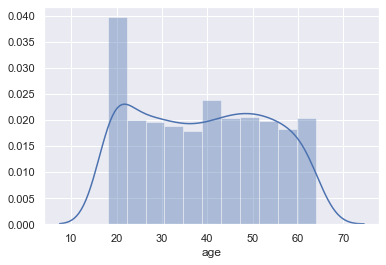

In [12]:
sns.distplot(df['age'])

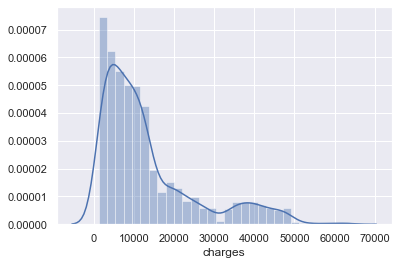

In [13]:
sns.distplot(df['charges'])

### 7. EDA - Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [18]:
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [ ]:
#Charges field is more skewed towards the left

### 8. EDA - Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

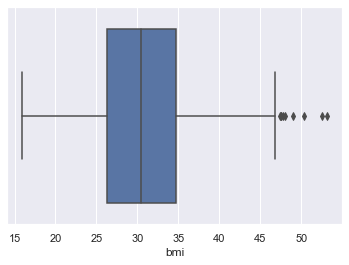

In [20]:
sns.boxplot(df['bmi'])

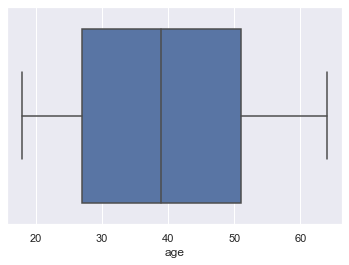

In [21]:
sns.boxplot(df['age'])

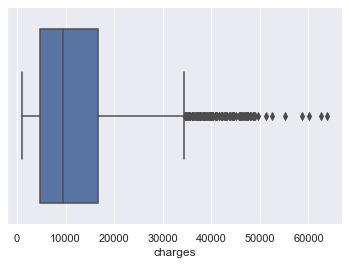

In [22]:
sns.boxplot(df['charges'])

### 9. EDA - Distribution of categorical columns

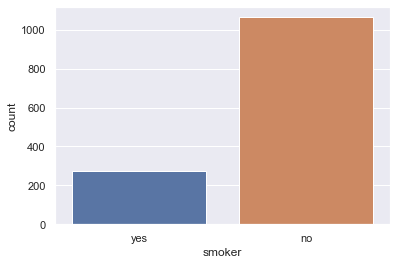

In [26]:
sns.countplot(df['smoker'])

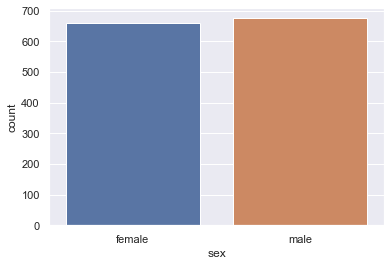

In [27]:
sns.countplot(df['sex'])

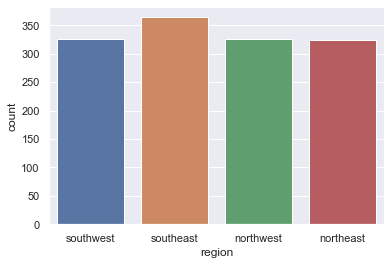

In [28]:
sns.countplot(df['region'])

### 10. EDA - Pair plot that includes all the columns of the data frame

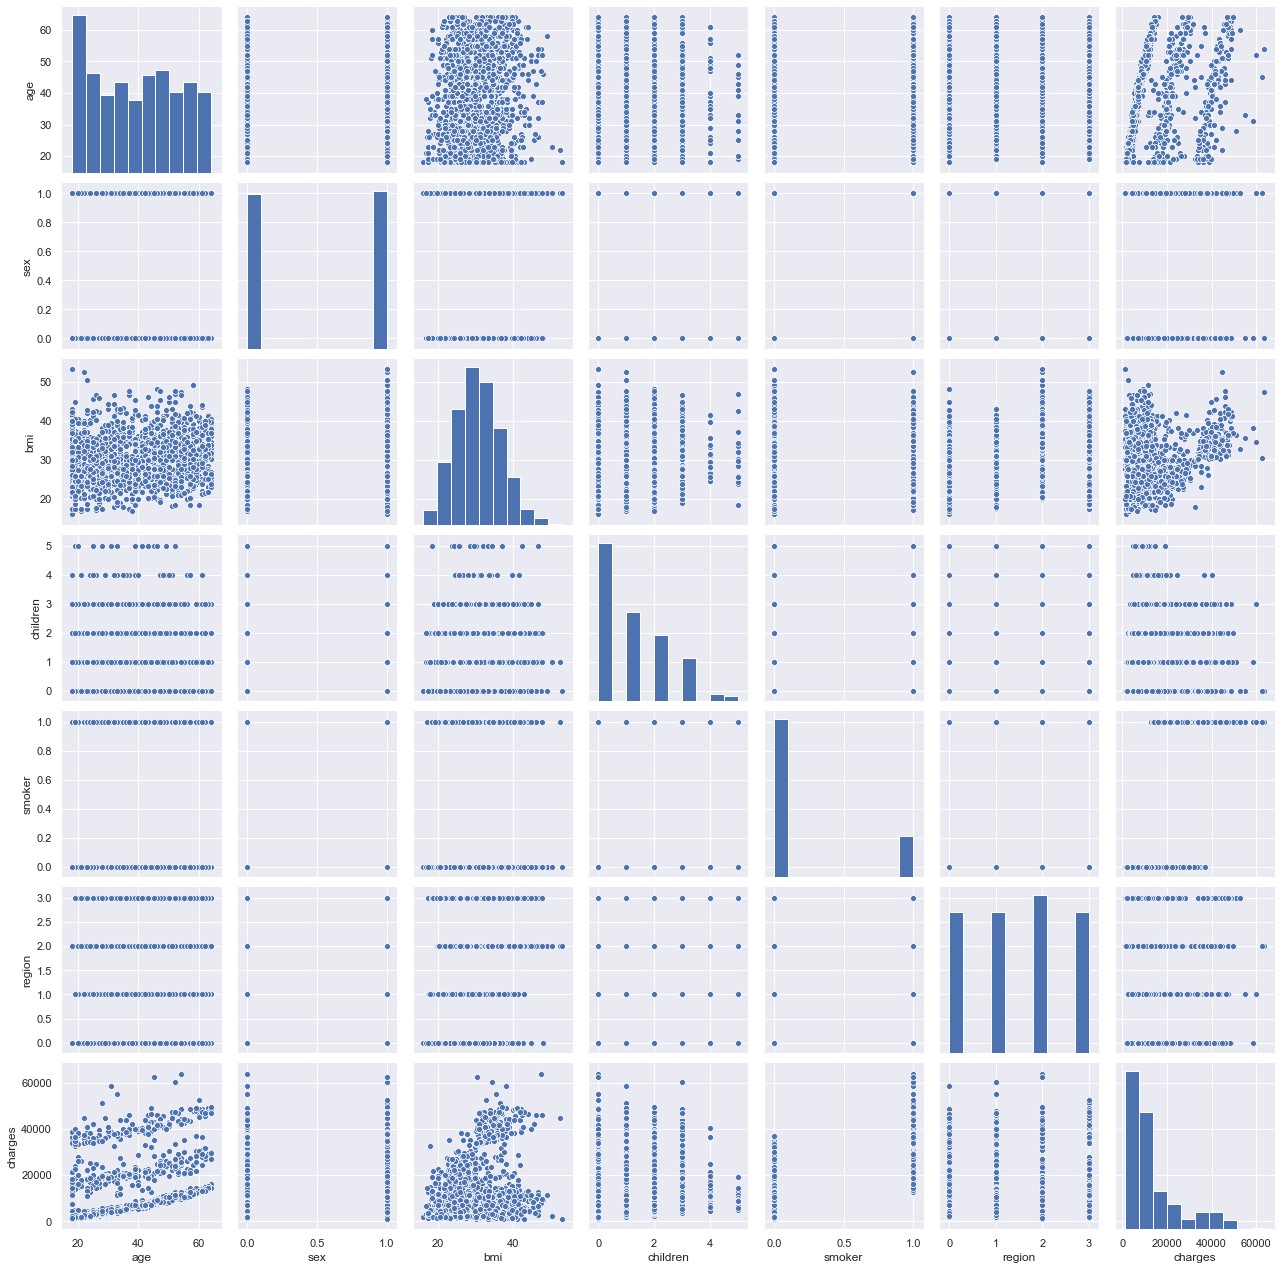

In [47]:
#Label encoding the variables before doing a pairplot because pairplot ignores strings
df_encoded = df
df_encoded.loc[:,['sex', 'smoker', 'region']] = df.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_encoded)  #pairplot
plt.show()

### 11.Do charges of people who smoke differ significantly from the people who don't?

In [30]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

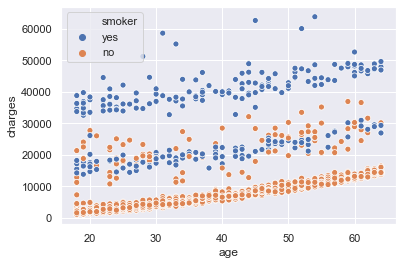

In [31]:
sns.scatterplot(df.age, df.charges,hue=df.smoker)
plt.show()

In [35]:
Ho = "Charges of smoker and non-smoker are same"   
Ha = "Charges of smoker and non-smoker are not the same"

x = np.array(df[df.smoker == 'yes'].charges) 
y = np.array(df[df.smoker == 'no'].charges)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

8.271435842177219e-283


In [37]:
#Since p value is less than 0.05, we reject the null hypothesis that Charges of smoker and non-smoker are same.
#So Charges of smoker and non-smoker are not the same

### 12. Does bmi of males differ significantly from that of females

In [38]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [39]:
Ho = "BMI of Males and Females are same"   
Ha = "BMI of Males and Females are not the same"

x = np.array(df[df.sex == 'male'].bmi) 
y = np.array(df[df.sex == 'female'].bmi) 

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

print(p_value)

0.08997637178984932


In [49]:
#Since p value is greater than 0.05, we retain the null hypothesis that BMI of Males and Females are same.

### 13. Is the proportion of smokers significantly different in different genders

In [40]:
Ho = "Gender has no effect on smoking habits" 
Ha = "Gender has an effect on smoking habits"   

crosstab = pd.crosstab(df['sex'],df['smoker']) 
chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)
print(p_value)

0.006548143503580696


In [48]:
#Since p value is greater than 0.05, we retain the null hypothesis that Gender has no effect on smoking habits.

### 14. Is the distribution of bmi across women with no children, one child and two children, the same

In [41]:
Ho = "No. of children has no effect on bmi"   
Ha = "No. of children has an effect on bmi"   

female_df =df[df['sex'] == 'female']

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)

0.7158579926754841


In [ ]:
#Since p value is greater than 0.05, we retain the null hypothesis that No. of children has no effect on bmi.